# Semestrální úloha - Ester Stankovská


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [2]:
# Define the start and end dates
start = '2010-01-01'
end = '2022-01-01'
df = yf.download('AAPL', start=start, end=end)


[*********************100%%**********************]  1 of 1 completed


In [3]:
df.reset_index(drop=True, inplace=True)

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
0,7.622500,7.660714,7.585000,7.643214,6.461976,493729600
1,7.664286,7.699643,7.616071,7.656429,6.473147,601904800
2,7.656429,7.686786,7.526786,7.534643,6.370184,552160000
3,7.562500,7.571429,7.466071,7.520714,6.358407,477131200
4,7.510714,7.571429,7.466429,7.570714,6.400681,447610800


In [5]:
df.drop(columns='Adj Close', inplace=True)

In [6]:
df.tail()

,Open,High,Low,Close,Volume
3016,177.089996,180.419998,177.070007,180.330002,74919600
3017,180.160004,181.330002,178.529999,179.289993,79144300
3018,179.330002,180.630005,178.139999,179.380005,62348900
3019,179.470001,180.570007,178.089996,178.199997,59773000
3020,178.089996,179.229996,177.259995,177.570007,64062300


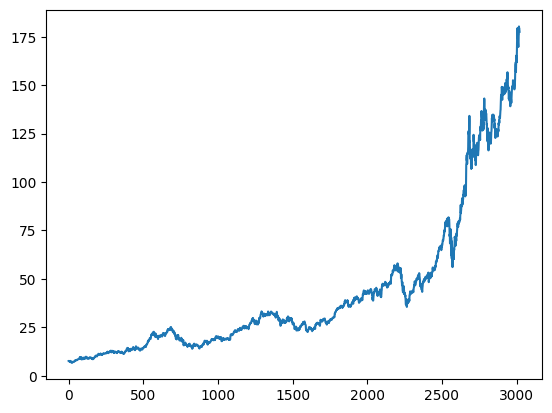

In [7]:
plt.plot(df.Close) # hodnota posledni transakce za den

In [8]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3016,177.089996,180.419998,177.070007,180.330002,74919600
3017,180.160004,181.330002,178.529999,179.289993,79144300
3018,179.330002,180.630005,178.139999,179.380005,62348900
3019,179.470001,180.570007,178.089996,178.199997,59773000


In [9]:
ma100 = df.Close.rolling(100).mean() # moving average
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3016    153.3444
3017    153.6667
3018    153.9991
3019    154.3202
3020    154.6399
Name: Close, Length: 3021, dtype: float64

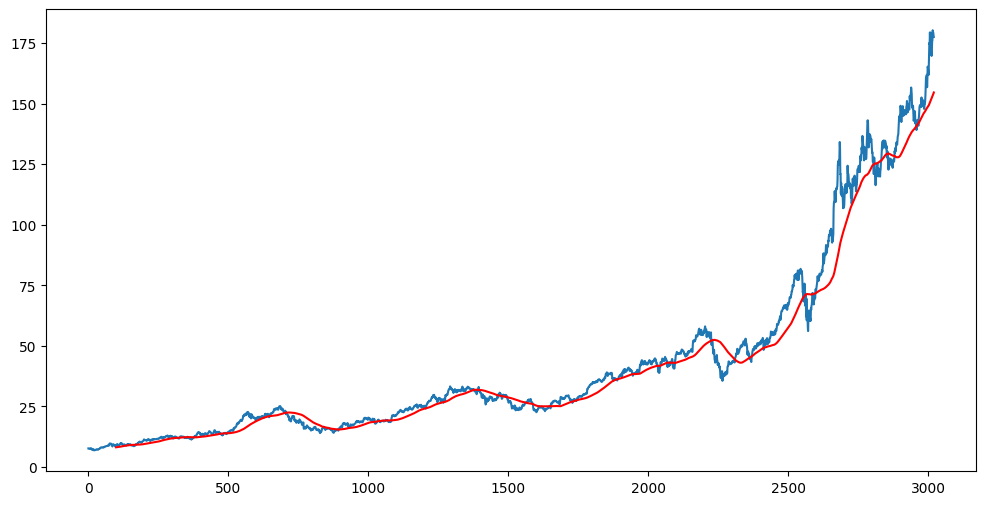

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [11]:
ma200 = df.Close.rolling(200).mean() # moving average
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3016    142.85570
3017    143.13220
3018    143.40125
3019    143.66845
3020    143.95365
Name: Close, Length: 3021, dtype: float64

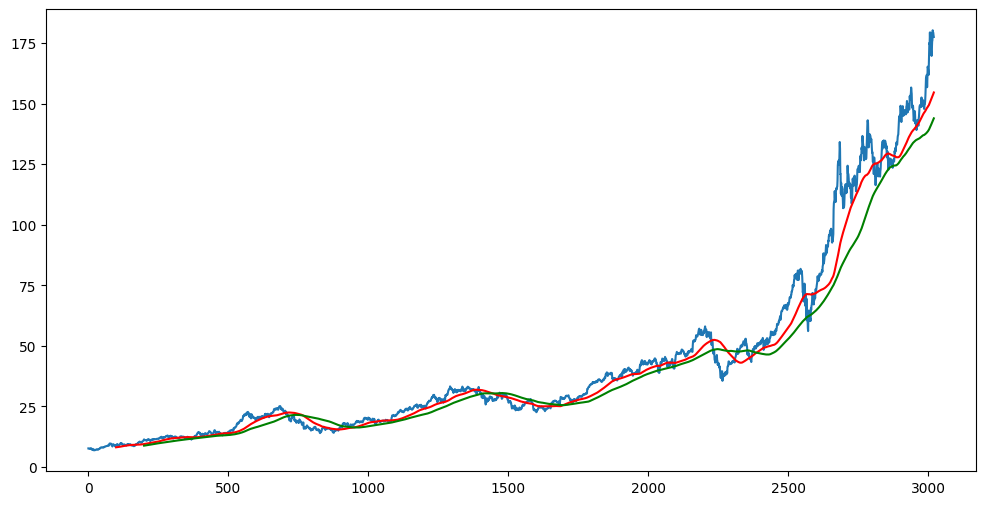

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [13]:
# Spliting data into training and testing

In [14]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(2114, 1)
(907, 1)


In [15]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [16]:
data_testing.head()

,Close
2114,46.974998
2115,46.875000
2116,46.717499
2117,47.560001
2118,47.957500


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.0192931 ],
       [0.01961817],
       [0.01662229],
       ...,
       [0.98966821],
       [0.98837669],
       [0.9910212 ]])

In [19]:
data_training_array.shape # 0,1

(2114, 1)

In [20]:
x_train = []
y_train = []

for i in range (100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i]) # minus 100 starts from 0
    y_train.append(data_training_array[i,0]) #1 column

x_train, y_train = np.array(x_train), np.array(y_train)

In [21]:
x_train.shape

(2014, 100, 1)

In [22]:
# ML model

In [23]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [26]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))



In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - loss: 0.0638
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 0.0085
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 0.0070
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 0.0059
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 0.0068
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - loss: 0.0052
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 0.0052
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - loss: 0.0051
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - loss: 0.0045
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - loss: 0.0047
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 147ms/step - loss: 0.0035
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - loss: 0.0035
Epoch 13/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 147ms/step - loss: 0.0043
Epoch 14/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - loss: 0.0037
Epoch 15/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - loss: 

In [48]:
model.save('keras_model.h5')

In [32]:
data_testing.head()

,Close
2114,46.974998
2115,46.875000
2116,46.717499
2117,47.560001
2118,47.957500


In [54]:
past_100_days = data_training.tail(100)

In [68]:
final_df = past_100_days._append(data_testing, ignore_index=True)

In [69]:
final_df.head()

,Close
0,43.057499
1,43.257500
2,43.750000
3,43.587502
4,43.582500


In [91]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0518709 ],
       [0.05325229],
       [0.05665394],
       ...,
       [0.99343845],
       [0.98528824],
       [0.98093696]])

In [92]:
input_data.shape

(1007, 1)

In [93]:
x_test = []
y_test = []

for i in range (100,input_data.shape[0]):
    x_test.append(input_data[i-100:i]) # minus 100 starts from 0
    y_test.append(input_data[i,0]) #1 column


In [94]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(907, 100, 1)
(907,)


In [95]:
# Making predictions

In [96]:
y_predicted = model.predict(x_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


In [98]:
y_predicted.shape

(907, 1)

In [99]:
y_test

array([0.07892872, 0.07823804, 0.07715019, 0.08296929, 0.08571478,
       0.08827033, 0.08942723, 0.08852935, 0.08549029, 0.08467873,
       0.0864918 , 0.08376357, 0.08393625, 0.08055185, 0.08037919,
       0.07511267, 0.07651131, 0.07471553, 0.07378308, 0.06903458,
       0.07293697, 0.07247078, 0.07478459, 0.07411116, 0.07768548,
       0.07205635, 0.0746119 , 0.07904961, 0.08355637, 0.08315923,
       0.07889421, 0.08433339, 0.08485141, 0.08412619, 0.08505861,
       0.08324554, 0.08580112, 0.08504135, 0.0853349 , 0.08773505,
       0.0908777 , 0.0898244 , 0.08424705, 0.08239946, 0.0830556 ,
       0.10241223, 0.11258266, 0.11361871, 0.11548358, 0.11209918,
       0.11234092, 0.1151555 , 0.1128244 , 0.11513821, 0.11665774,
       0.11750385, 0.12282217, 0.13017802, 0.12651737, 0.12579212,
       0.1258094 , 0.12656917, 0.12772607, 0.13079965, 0.13383868,
       0.13950234, 0.14304214, 0.14753165, 0.14879215, 0.14621932,
       0.13970957, 0.13660145, 0.13147307, 0.14100462, 0.13620

In [100]:
y_predicted

array([[0.10672241],
       [0.10726745],
       [0.10778673],
       [0.10827455],
       [0.10873233],
       [0.10917163],
       [0.10960717],
       [0.11005323],
       [0.11051819],
       [0.11100022],
       [0.11148989],
       [0.11197878],
       [0.11245744],
       [0.11291501],
       [0.11333944],
       [0.11371855],
       [0.11403792],
       [0.11428575],
       [0.11445631],
       [0.11454664],
       [0.11455329],
       [0.11447884],
       [0.11433327],
       [0.11413151],
       [0.11389026],
       [0.11362861],
       [0.1133586 ],
       [0.11308679],
       [0.11282653],
       [0.11259757],
       [0.11241743],
       [0.11229022],
       [0.11221775],
       [0.11220397],
       [0.11224771],
       [0.11234502],
       [0.11248809],
       [0.11266932],
       [0.11288229],
       [0.11311978],
       [0.11337809],
       [0.11365968],
       [0.11396678],
       [0.11429016],
       [0.11461231],
       [0.11491773],
       [0.11522333],
       [0.115

In [101]:
scaler.scale_

array([0.00690691])

In [102]:
scale_factor = 1/0.00690691
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

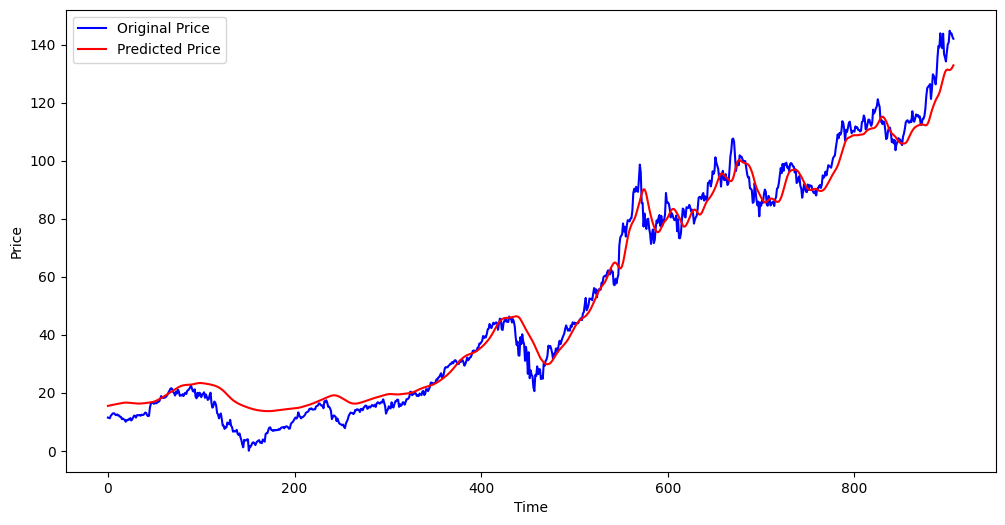

In [103]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
